## Regular Graphs
This experiment looks at the critical temperature for phase transitions in $d$-regular graphs (number of nodes fixed) and 4-regular graphs (number of nodes varying)

In [11]:
# imports
import sys
import os

sys.dont_write_bytecode = True

# For imports
sys.path.append(os.path.abspath(".."))

# Ising code
from ising_magnetic import ising
from ising_graph import IsingGraph
from ising_node import IsingNode

import numpy as np
import matplotlib.pyplot as plt

# Graph code
import networkx as nx
from nx_util import GraphUtil

100%|██████████| 8/8 [16:48<00:00, 126.07s/it]


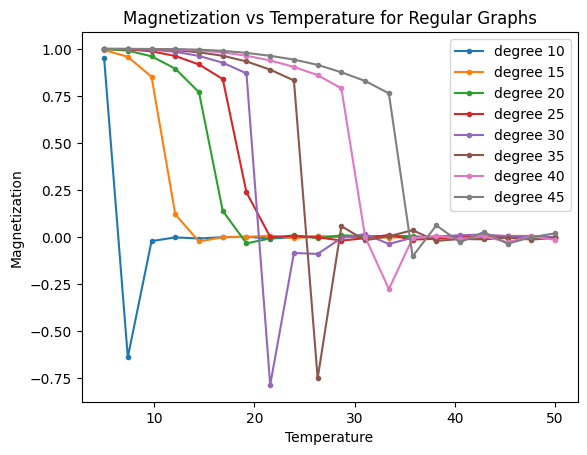

In [31]:
# Compute magnetization at steady state for fixed temperature, varying regularity
from tqdm import tqdm

util = GraphUtil()

N = 100
num_steps = 5000

degree_mag_map = {}

for d in tqdm(range(10, 50, 5)):
    G = nx.random_regular_graph(d, N)
    M_values = []
    T_list = np.linspace(5, 50, 20)
    for T in T_list:
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(ising(ising_graph, T, num_steps))
    plt.plot(T_list, M_values, label=f"degree {d}", marker='.')
    degree_mag_map[d] = M_values

plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for Regular Graphs")
plt.legend()
plt.show()

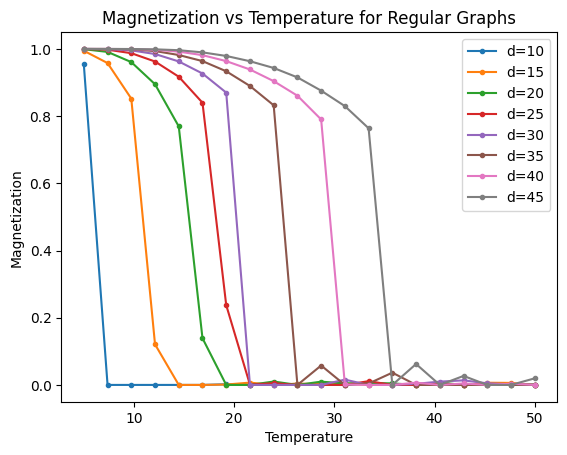

In [36]:
for d in degree_mag_map:
    plt.plot(T_list, [max(0, m) for m in degree_mag_map[d]], label=f"d={d}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for Regular Graphs")
plt.legend()
plt.show()

100%|██████████| 50/50 [01:09<00:00,  1.40s/it]


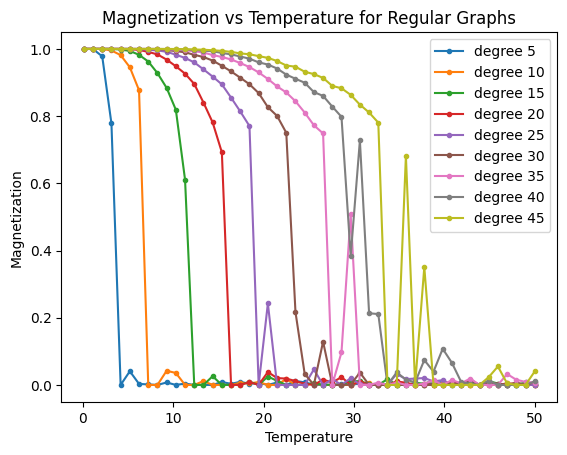

In [64]:
util = GraphUtil()

N = 100
num_steps = 1000
degree_mag_map = {}

for d in (range(5, 50, 5)):
    G = nx.random_regular_graph(d, N)
    M_values = []
    T_list = np.linspace(0.1, 50, 50)
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    plt.plot(T_list, M_values, label=f"degree {d}", marker='.')
    degree_mag_map[d] = M_values

plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for Regular Graphs")
plt.legend()
plt.show()

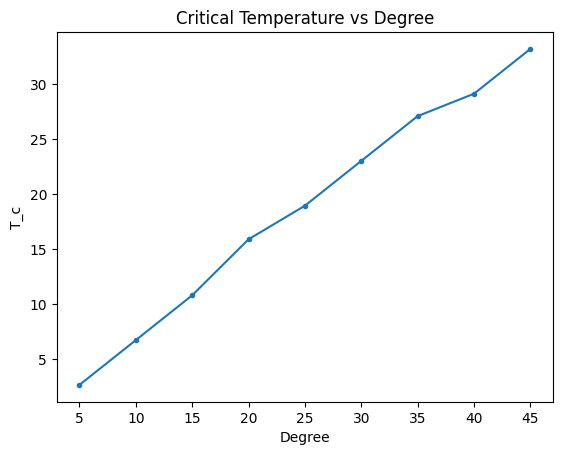

In [65]:
# Compute T_c
T_list = np.linspace(0.1, 50, 50)
T_c_list = []
degs = np.arange(5, 50, 5)
for d in degs:
    for i in range(len(T_list) - 1):
        if abs(degree_mag_map[d][i] - degree_mag_map[d][i + 1]) > 0.1:
            T_c_list.append((T_list[i] + T_list[i + 1]) / 2)
            break

plt.plot(degs, T_c_list, marker='.')
plt.xlabel("Degree")
plt.ylabel("T_c")
plt.title("Critical Temperature vs Degree")
plt.show()

[0.9130144995001007, 0.9388249990426758, 0.953978389335574, 0.9554099999697903, 0.9565848641499742, 0.9594747726367966, 0.9511779461428881, 0.9579036022847781, 0.9589489414480125]


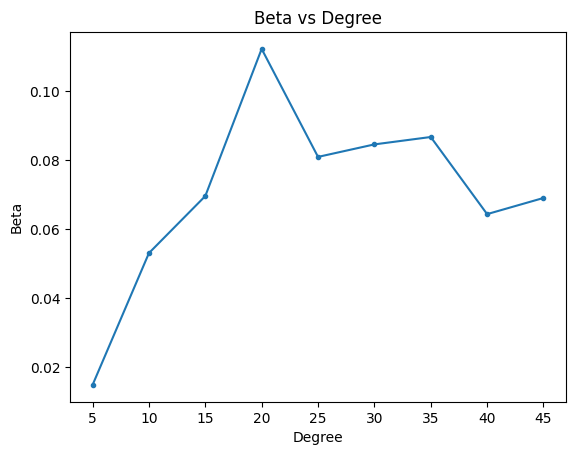

In [67]:
# Assume power law, or m ~ |T - T_c|^beta
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

reg = LinearRegression()

beta_list = []
r2_list = []
eps = 1e-7
for d, T_c in zip(degree_mag_map, T_c_list):
    M_values = degree_mag_map[d]
    T_list = np.linspace(0.1, 50, 50)

    idx = []
    for i in range(len(M_values)):
        if M_values[i] > 0 and T_list[i] < T_c:
            idx.append(i)

    # want to fit slope of log(M) vs log(|T - T_c|)
    log_M = np.log([max(0, m) + eps for m in np.array(M_values)[idx]])
    log_T = np.log([(T_c - T) + eps for T in np.array(T_list)[idx]])

    reg.fit(log_T.reshape(-1, 1), log_M.reshape(-1, 1))
    beta_list.append(reg.coef_[0][0])

    pred = reg.predict(log_T.reshape(-1, 1))
    r2 = r2_score(log_M, pred)
    r2_list.append(r2)
print(r2_list)
plt.plot(degs, beta_list, marker='.')
plt.xlabel("Degree")
plt.ylabel("Beta")
plt.title("Beta vs Degree")
plt.show()


In [94]:
print(beta_list)

[0.014879318829512201, 0.05305449694975987, 0.06957523602786897, 0.11217752731480204, 0.0809096441155965, 0.08453101156398013, 0.08667203972103843, 0.06433905207397307, 0.06901679774078663]


100%|██████████| 50/50 [04:38<00:00,  5.58s/it]


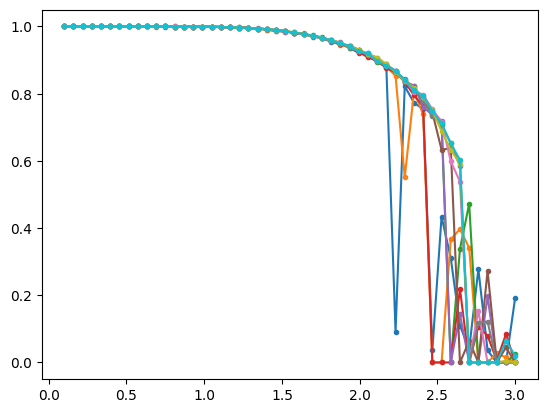

In [70]:
# consider 4-regular graphs

N_list = np.linspace(100, 500, 10, dtype=int)
num_steps = 1000
N_mag_map = {}
for N in N_list:
    G = nx.random_regular_graph(4, N)
    M_values = []
    T_list = np.linspace(0.1, 3, 50)
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    plt.plot(T_list, M_values, label=f"N={N}", marker='.')
    N_mag_map[N] = M_values

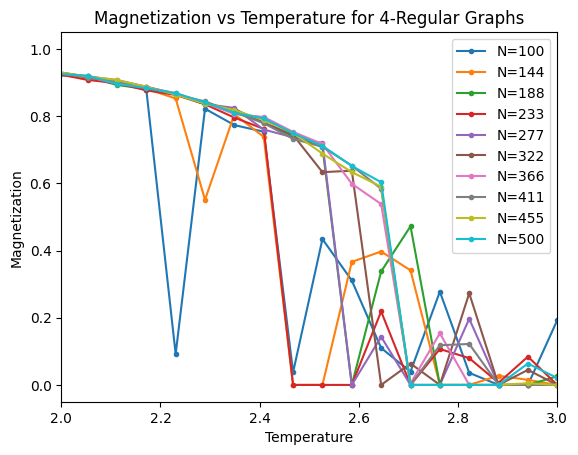

In [81]:
for N in N_mag_map:
    plt.plot(T_list, [max(0, m) for m in N_mag_map[N]], label=f"N={N}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for 4-Regular Graphs")
plt.xlim(2, 3)
plt.legend()
plt.show()



100%|██████████| 20/20 [4:30:14<00:00, 810.72s/it]   


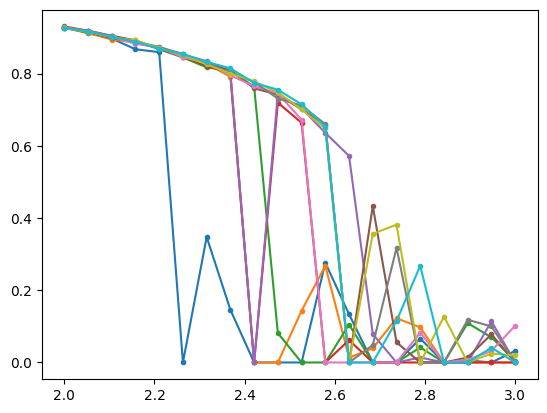

In [86]:
# consider 4-regular graphs

N_list = np.linspace(100, 500, 10, dtype=int)
num_steps = 2000
N_mag_map = {}
for N in (N_list):
    G = nx.random_regular_graph(4, N)
    M_values = []
    T_list = np.linspace(2, 3, 20)
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    plt.plot(T_list, M_values, label=f"N={N}", marker='.')
    N_mag_map[N] = M_values

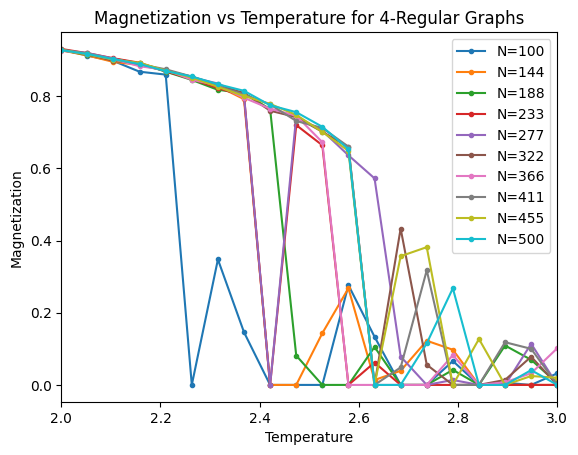

In [93]:
for N in N_mag_map:
    plt.plot(T_list, [max(0, m) for m in N_mag_map[N]], label=f"N={N}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for 4-Regular Graphs")
plt.xlim(2, 3)
plt.legend()
plt.show()

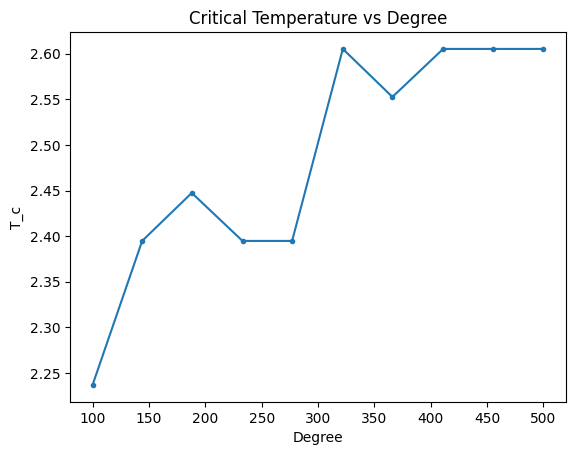

In [97]:
# Compute T_c
T_list = np.linspace(2, 3, 20)
T_c_list = []
degs = np.arange(5, 50, 5)
for N in N_list:
    for i in range(len(T_list) - 1):
        if N_mag_map[N][i] - N_mag_map[N][i + 1] > 0.1:
            T_c_list.append((T_list[i] + T_list[i + 1]) / 2)
            break

plt.plot(N_list, T_c_list, marker='.')
plt.xlabel("Degree")
plt.ylabel("T_c")
plt.title("Critical Temperature vs Degree")
plt.show()

[0.03511713668223342, 0.05740077029166866, 0.06969773082094613, 0.05794091646600065, 0.05408641805267778, 0.11758452053458367, 0.10724964248024133, 0.11634447303854253, 0.12030480234332278, 0.11568945071633929]
[0.8617604306507755, 0.9741419048830269, 0.9489988724831846, 0.9337818466923157, 0.9543201142023036, 0.9565518719476422, 0.979877432114955, 0.958632209610652, 0.9760731414666587, 0.9810715704551628]


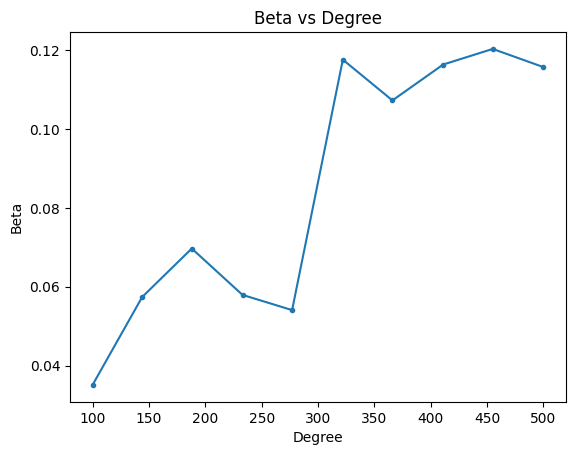

In [100]:
# Assume power law, or m ~ |T - T_c|^beta


beta_list = []
r2_list = []
eps = 1e-7
for N, T_c in zip(N_mag_map, T_c_list):
    M_values = N_mag_map[N]
    T_list = np.linspace(2, 3, 20)

    idx = []
    for i in range(len(M_values)):
        if M_values[i] > 0 and T_list[i] < T_c:
            idx.append(i)

    # want to fit slope of log(M) vs log(|T - T_c|)
    log_M = np.log([max(0, m) + eps for m in np.array(M_values)[idx]])
    log_T = np.log([(T_c - T) + eps for T in np.array(T_list)[idx]])

    reg.fit(log_T.reshape(-1, 1), log_M.reshape(-1, 1))
    beta_list.append(reg.coef_[0][0])

    pred = reg.predict(log_T.reshape(-1, 1))
    r2 = r2_score(log_M, pred)
    r2_list.append(r2)
print(beta_list)
print(r2_list)
plt.plot(N_list, beta_list, marker='.')
plt.xlabel("Degree")
plt.ylabel("Beta")
plt.title("Beta vs Degree")
plt.show()


100%|██████████| 20/20 [11:38<00:00, 34.94s/it]


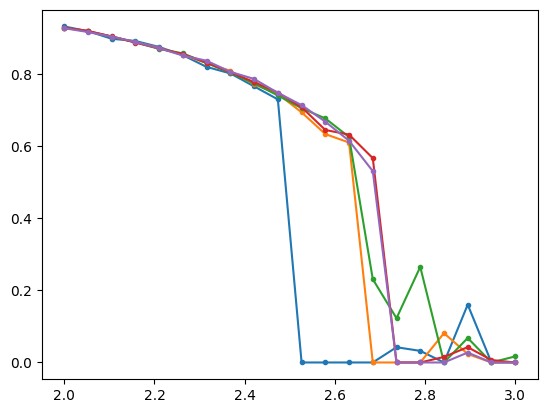

In [101]:
# consider 4-regular graphs

N_list = np.arange(200, 1100, 200, dtype=int)
T_list = np.linspace(2, 3, 20)

num_steps = 2000
N_mag_map = {}
for N in (N_list):
    G = nx.random_regular_graph(4, N)
    M_values = []
    for T in tqdm(T_list):
        ising_graph = util.nx_to_ising_graph(G)
        ising(ising_graph, T, num_steps, reset=True)
        M_values.append(max(0, ising(ising_graph, T, num_steps)))
    plt.plot(T_list, M_values, label=f"N={N}", marker='.')
    N_mag_map[N] = M_values

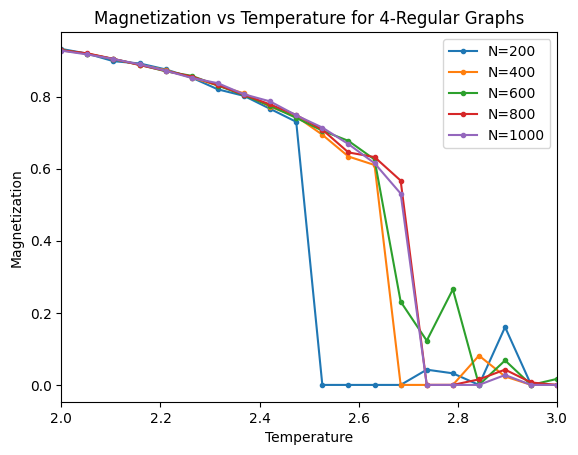

In [102]:
for N in N_mag_map:
    plt.plot(T_list, [max(0, m) for m in N_mag_map[N]], label=f"N={N}", marker='.')
plt.xlabel("Temperature")
plt.ylabel("Magnetization")
plt.title("Magnetization vs Temperature for 4-Regular Graphs")
plt.xlim(2, 3)
plt.legend()
plt.show()

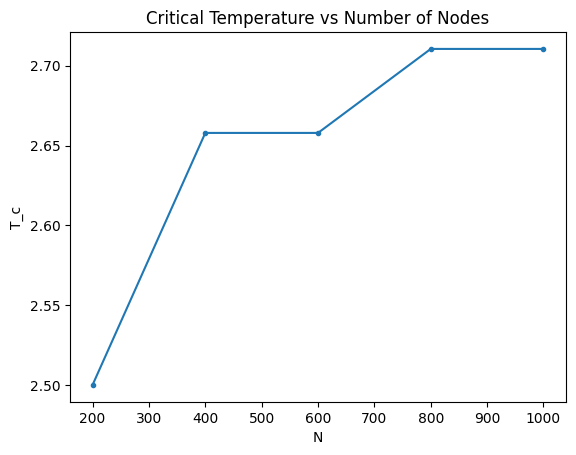

In [105]:
# Compute T_c
T_list = np.linspace(2, 3, 20)
T_c_list = []
degs = np.arange(5, 50, 5)
for N in N_list:
    for i in range(len(T_list) - 1):
        if N_mag_map[N][i] - N_mag_map[N][i + 1] > 0.1:
            T_c_list.append((T_list[i] + T_list[i + 1]) / 2)
            break

plt.plot(N_list, T_c_list, marker='.')
plt.xlabel("N")
plt.ylabel("T_c")
plt.title("Critical Temperature vs Number of Nodes")
plt.show()

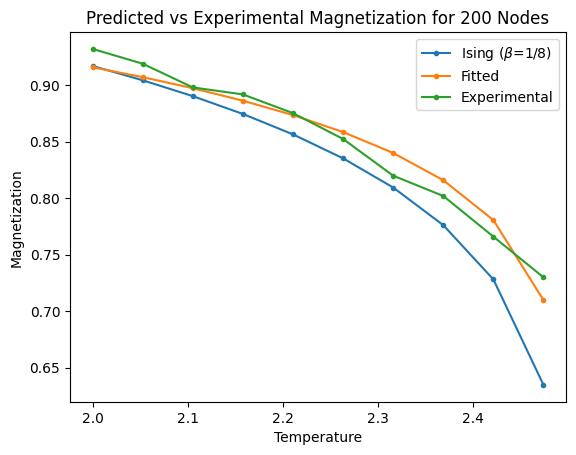

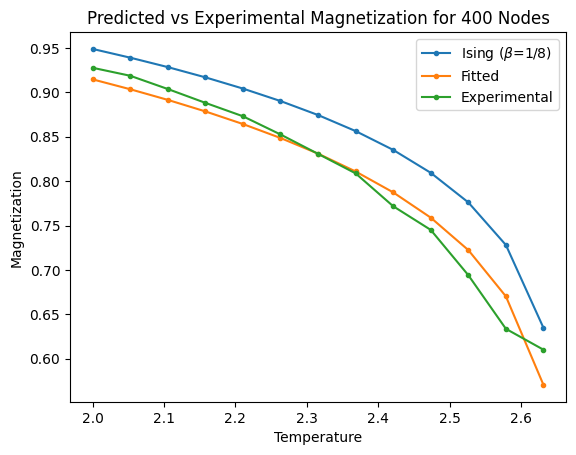

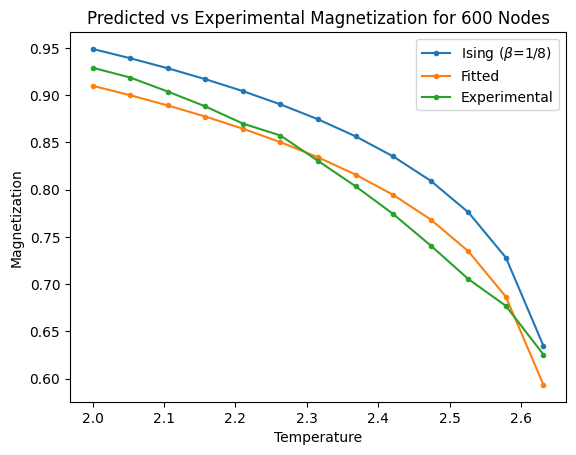

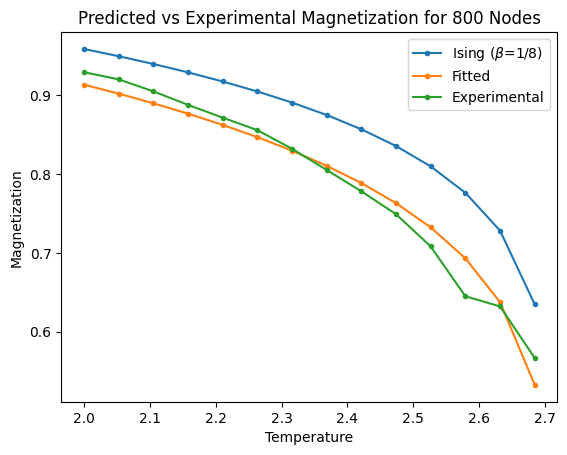

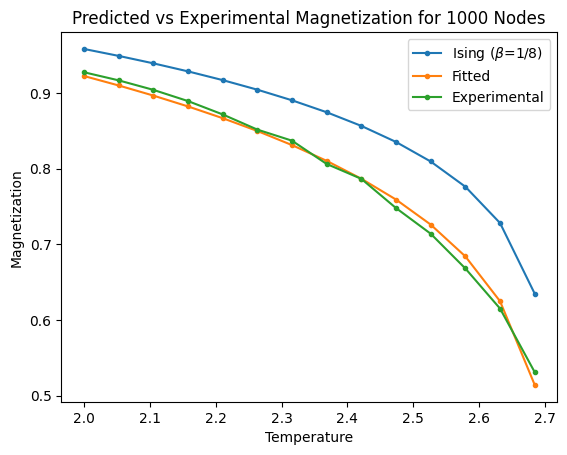

[0.08661650368617256, 0.1467180583153115, 0.1328653794236789, 0.16348330073063277, 0.17736869068173042]
[0.9561525870581223, 0.9534440240013431, 0.9567986147595635, 0.9614905300652565, 0.9925742548897045]


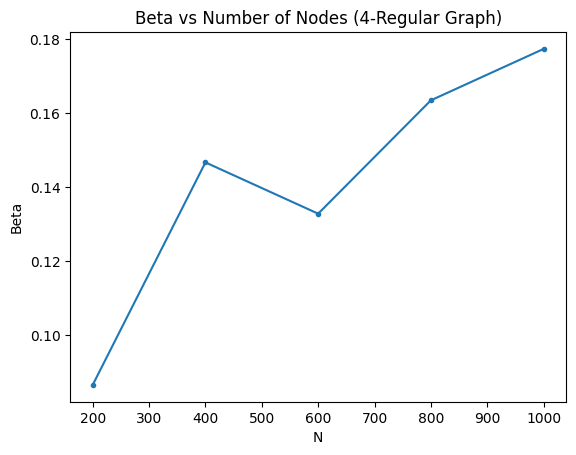

In [120]:
# Assume power law, or m ~ |T - T_c|^beta


beta_list = []
r2_list = []
eps = 1e-7
for N, T_c in zip(N_mag_map, T_c_list):
    M_values = N_mag_map[N]
    T_list = np.linspace(2, 3, 20)

    idx = []
    for i in range(len(M_values)):
        if M_values[i] > 0 and T_list[i] < T_c:
            idx.append(i)

    # want to fit slope of log(M) vs log(|T - T_c|)
    log_M = np.log([max(0, m) + eps for m in np.array(M_values)[idx]])
    log_T = np.log([(T_c - T) + eps for T in np.array(T_list)[idx]])

    reg.fit(log_T.reshape(-1, 1), log_M.reshape(-1, 1))
    beta_list.append(reg.coef_[0][0])

    pred = reg.predict(log_T.reshape(-1, 1))
    r2 = r2_score(log_M, pred)
    r2_list.append(r2)
    plt.plot(T_list[idx], np.exp(0.125 * log_T.reshape(-1, 1)), marker='.', label='Ising ($\\beta$=1/8)')
    plt.plot(T_list[idx], np.exp(pred), label='Fitted', marker='.')
    plt.plot(T_list[idx], np.array(M_values)[idx], label='Experimental', marker='.')
    plt.xlabel("Temperature")
    plt.ylabel("Magnetization")
    plt.legend()
    plt.title(f"Predicted vs Experimental Magnetization for {N} Nodes")
    plt.show()
plt.show()
print(beta_list)
print(r2_list)
plt.plot(N_list, beta_list, marker='.')
plt.xlabel("N")
plt.ylabel("Beta")
plt.title("Beta vs Number of Nodes (4-Regular Graph)")
plt.show()
